# set

> A set contains a set number of points, breaks, timeouts and other

## Contents
TODO this properly
`VballSet`

In [ ]:
#| default_exp sets

In [ ]:
#| export
from nbdev.showdoc import *
from nbdev import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastcore.basics import patch

Based on [this study](https://www.researchgate.net/publication/337366592_Rally_length_and_rest_time_in_women's_volleyball) assume that the length of a point and break between a set are normally distributed and equal to:
 - TODO should change to be left skewed
 
Let PM be the point legth in a mens volleyball game
$$PM \sim N(4.99, 4.35^2)$$
Let RM be the ress length in a mens volleyball games, 
$$RM \sim N(29.02, 19.44^2)$$

Let PW be the point legth in a womens volleyball game
$$PW \sim N(6.88, 5.92^2)$$
Let RW be the ress length in a womens volleyball games, 
$$RW \sim N(29.92, 18.21^2)$$

Assume elite volleyball point times are comparable to ACT club times

Assume that there are 3 timeouts per set
- TODO change this eventually

In [ ]:
# TODO remove normality assumption
# TODO remove max 25 assumption

Assume one team always gets 25 (doesn't go above)
- Therefore the other team can't exceed 23

Assume that the number of points for the second team follows a binomial distribution:
$$X \sim Bin(23, 0.85)$$

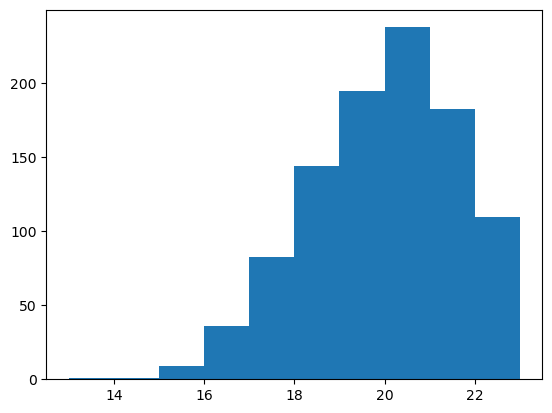

In [ ]:
test_bin = np.random.binomial(23, 0.85, 1000)
plt.hist(test_bin)
plt.show()

In [ ]:
#| export
class VballSet:
    '''
    Creates a set with and times the length of a set
    '''
    def __init__(self, 
             div:str): # The division of the set [PM, PW, RM, RW]
        # Set the point variables
        divisions = ["PM", "PW", "RM", "RW"]
        assert div in str(divisions), "Division is not valid must be: PM, PW, RM or RW"
        self.div = div
        if div == "PM" or div == "RM":
            self.point_mean = 4.99
            self.point_sd = 4.35
            self.rest_mean = 29.02
            self.rest_sd = 19.44
        else: 
            self.point_mean = 6.88
            self.point_sd = 5.92
            self.rest_mean = 28.92
            self.rest_sd = 18.21
            
        # Determine the number of points. 
        self.points = 25 + int(np.random.binomial(23, 0.85, 1))
        # 1 lest rest than points as last point doesn't have a break
        self.rests = self.points - 1
        
        time_points = np.random.normal(self.point_mean, self.point_sd, self.points).sum()
        
        time_rests = np.random.normal(self.rest_mean, self.rest_sd, self.rests).sum()
        
        # 3 30s timeouts
        time_timeouts = 3 * 30
        
        self.time_set = time_points + time_rests + time_timeouts        
        
    def __str__(self): return f"{'Length of set is '}{int(self.time_set/60)}{' mins long'}"
    def __repr__(self): return repr(f'VballSet("{self.div}")')

In [ ]:
show_doc(VballSet)

---

### VballSet

>      VballSet (div:str)

Creates a set with and times the length of a set

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| div | str | The division of the set [PM, PW, RM, RW] |

In [ ]:
#| export
@patch
def GetTime(self:VballSet, # An function to output time of set ofr vball set
           ) -> float: # Returns the time of the set in seconds 
    return self.time_set

In [ ]:
show_doc(VballSet.GetTime)

---

### VballSet.GetTime

>      VballSet.GetTime ()

## Tests
Include some examples and unit tests below

In [ ]:
pw_set = VballSet("PW")

In [ ]:
pw_set.GetTime()

1711.295522824047

In [ ]:
#| export
def foo(): pass

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
43 * 6.88

295.84